# 데이터명 : Boston Housing Price (보스턴 주택 가격 데이터) 

- 레코드수 : 506 개 
- 필드개수 :  14 개 

- 데이터설명 : 보스턴 시의 주택 가격에 대한 데이터이다. 
주택의 여러가진 요건들과 주택의 가격 정보가 포함되어 있다. 주택의 가격에 영향을 미치는 요소를 분석하고자 하는 목적으로 사용될 수 있다. 회귀분석 등의 분석에 활용될 수 있다. 

- 보스턴 주택 데이터는 여러 개의 측정지표들 (예를 들어, 범죄율, 학생/교사 비율 등)을 포함한, 보스턴 인근의 주택 가격의 중앙값(median value)이다. 이 데이터 집합은 14개의 변수를 포함하고 있다. 


# 데이터 분석 처리 단계 

# 1단계 : 탐색적 자료 분석 (EDA : Exploratory Data Analysis)
- 시각화와 기술 통계(Descriptive statistics)를 통해서 데이터를 이해하는 단계이다.

## 1-1 모듈 사용하기 

In [1]:
import pandas as pd

## 1-2 데이터 읽어오기

In [2]:
path = './data/boston_housing/housing.csv'

In [3]:
data_pre = pd.read_csv(path, delimiter=r"\s+")

### 데이터 상태 확인하기

In [4]:
data_pre.shape

(505, 14)

## 1-3 데이터 확인하기 

## 필드의 이해 : 
데이터의 이해를 돕기 위해 포함된 14개의 변수에 대하여 간략하게 설명한다.  
위 14개의 필드는 입력 변수로 사용 가능하고, 맨 아래의 MEDV이 목표(종속) 변수로 사용된다. 


- [01]  CRIM	: 자치시(town) 별 1인당 범죄율
- [02]  ZN	    : 25,000 평방피트를 초과하는 거주지역의 비율
- [03]  INDUS	: 비소매상업지역이 점유하고 있는 토지의 비율
- [04]  CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- [05]  NOX	    : 10ppm 당 농축 일산화질소
- [06]  RM	    : 주택 1가구당 평균 방의 개수
- [07]  AGE	    : 1940년 이전에 건축된 소유주택의 비율
- [08]  DIS	    : 5개의 보스턴 직업센터까지의 접근성 지수
- [09]  RAD	    : 방사형 도로까지의 접근성 지수
- [10]  TAX	    : 10,000 달러 당 재산세율
- [11]  PTRATIO	: 자치시(town)별 학생/교사 비율
- [12]  B	    : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- [13]  LSTAT	: 모집단의 하위계층의 비율(%)
- [14]  MEDV	: 본인 소유의 주택가격(중앙값) (단위: $1,000)


출처: https://ai-times.tistory.com/431 [ai-times]

### 데이터 스키마 확인하기 

- 현재 데이터에 스크마 정보가 없음 

In [5]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5   6.5750   505 non-null    float64
 6   65.20    505 non-null    float64
 7   4.0900   505 non-null    float64
 8   1        505 non-null    int64  
 9   296.0    505 non-null    float64
 10  15.30    505 non-null    float64
 11  396.90   505 non-null    float64
 12  4.98     505 non-null    float64
 13  24.00    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


# 2단계 : 전처리 (Preprocessing)

데이터를 정제하고 가공해서 머신 러닝 모델의 입력에 적합한 형태로 바꿔주는 단계이다.

- Data Cleaning
  - Deduplication
  - Outlier detection
  - Other cleaning techniques

- For model
  - Feature extraction
  - Feature scaling
  - Dummification
  - Dimensionality reduction

탐색적 자료 분석과 전처리는 순차적이라기 보다 반복적인 관계이다. EDA를 통해 어떤 전처리가 필요한지 알 수 있고 전처리를 통해 EDA를 수월하게 할 수 있다.

## 1-3 특정 칼럼만 읽어오기

###  스키마을 지정해서 다시 데이터를 처리하기

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(len(column_names))

14


In [7]:
data = pd.read_csv(path, header=None, delimiter=r"\s+", names=column_names)

In [8]:
data.shape

(506, 14)

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


# 2. 정답확인 

- MEDV 값이 우리가 예측하려는 집값이다.
   먼저, 모델의 평가를 위해 학습용 데이터셋(Training dataset)과 평가용 데이터셋(Test dataset)을 나눈다.
   
- 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [11]:
data[['MEDV']].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## 정규화 처리 

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
df_scaled=data.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

In [15]:
#스케일링 변환된 값을 데이터프레임에 반영
data.iloc[:, :-1]=df_scaled[:, :]

In [16]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


# 학습데이터와 테스트데이터 분할

In [17]:
#학습데이터와 테스트데이터 분할
from sklearn.model_selection import train_test_split
x_data=data.loc[:, ['LSTAT', 'RM']]
y_data=data.loc[:, 'MEDV']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

In [18]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


# 3단계 : 모델 선택 (Model selection)

적절한 머신 러닝 모델을 선택하는 단계이다.

- 무엇을 선택할 것인가
  - Model
  - Features
  - Hyperparameters


- 어떻게 선택할 것인가
  - Metrics
  - Validation
  - Cross Validation (CV)

# 4단계 : 평가 및 예측 (Evaluation & Prediction)

만들어진 머신 러닝 모델의 성능을 평가하고 모델을 활용하여 새로운 데이터에 대한 예측을 하는 단계이다.

- 만들어진 모델이 얼마나 새로운 데이터에 대해 얼마나 일반화 (generalization) 가능한지 측정할 수 있다.
- 평가용 데이터셋은 모델 선택과 학습 과정에서 쓰이지 않아야 한다.
- 평가용 데이터셋은 학습용 데이터셋과 동일한 전처리 과정을 거쳐야 한다.


# 4-1 선형 회귀 모형

In [19]:
import numpy as np

## 선형 회귀 모형

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편

회귀계수(기울기): [-23.2  25.4]
상수항(절편): 16.3


## 예측값 저장

In [23]:
y_test_pred=lr.predict(x_test)


# 그래프 그리기

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

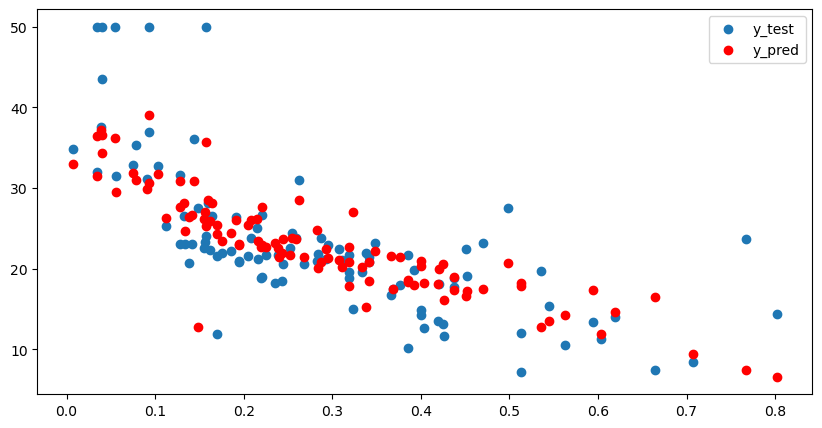

In [25]:
#예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(x_test['LSTAT'], y_test, label='y_test')  #파란점, 실제값
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

# 성능 평가

In [26]:
#성능 평가
from sklearn.metrics import mean_squared_error
y_train_pred=lr.predict(x_train)

In [27]:
train_mse=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mse)

Train MSE:30.8042


In [28]:
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Test MSE:29.5065


# 4-2 XGBOOST 알고리즘 적용

In [29]:
import xgboost as xgb

In [30]:
model_xgb = xgb.XGBRegressor()

In [31]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [32]:
y_train_pred= model_xgb.predict(x_train)


In [33]:
train_mse=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mse)

Train MSE:0.1726


In [34]:
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Test MSE:29.5065


# 4-3 light gbm 적용

In [35]:
import lightgbm as lgb

In [36]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [37]:
model_lgb.fit(x_train, y_train)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [38]:
y_train_pred= model_lgb.predict(x_train)


In [39]:
train_mse=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mse)

Train MSE:15.0182


In [40]:
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Test MSE:29.5065
